#### Imię i nazwisko: Patrycja Sekuła (254706), Julia Różycka (254756)  
Przedmiot: Analiza danych eksperymentalnych


# 1. Wybranie datasetu

> Spośród dostępnych na stronie Kaggle datasetów wybrano *TMDB 5000 Movie Dataset*.

### *TMDB 5000 Movie Dataset*

*TMDB 5000 Movie Dataset* stanowi kolekcję danych zawierającą informacje na temat około 5 000 filmów zebranych z The Movie Database (TMDb) w latach 1961-2015. Obejmuje ona szeroką gamę atrybutów dla każdego z filmów, stanowiąc tym samym obszerne źródło informacji dostępne do analizy. Kluczowe cechy tego zbioru to m.in.:

* **Tytuł**: Nazwa filmu.
* **Data premiery**: Termin premiery filmu.
* **Budżet**: Kwota przeznaczona na produkcję filmu.
* **Popularność**: Miara popularności filmu, wynikająca z różnych czynników, takich jak wzmianki w mediach społecznościowych, recenzje oraz oceny.
* **Przychody**: Całkowity dochód generowany przez film.
* **Gatunek**: Gatunek (lub gatunki) filmu.
* **Czas trwania**: Długość trwania filmu.
* **Liczba głosów**: Ilość głosów lub liczbę ocen zgromadzonych przez film.
* **Średnia ocen**: Średnia ocena przyznawana przez widzów.

### Powód wyboru zbioru danych
Decyzja o wyborze zbioru danych *TMDB 5000 Movie Dataset* do projektu opiera się na kilku czynnikach. Po pierwsze, zbiór zawiera istotne informacje na temat budżetów filmowych, popularności i przychodów, umożliwiając dogłębną analizę tych czynników i ich powiązań. Dodatkowo zbiór oferuje elastyczność w zakresie badania różnorodnych czynników, jeśli jest to konieczne do bardziej kompleksowej analizy. Zbiór jest także wystarczająco duży, zapewniając zróżnicowany zestaw filmów z różnych gatunków, okresów i zakresów budżetowych. Ta różnorodność zwiększa możliwość uogólnienia wyników.

Ostatnim aspektem przy wyborze tego datasetu było jego przełożenie na świat rzeczywisty. Zrozumienie wpływu budżetu i popularności na przychody z filmów jest nie tylko interesujące z analitycznego punktu widzenia, ale ma również praktyczne implikacje dla branży filmowej.

# 2. Załadowanie i opis danych
Ponieważ nie wszystkie cechy spełniają kryteria tego proejktu, ograniczono się do wybrania 3 cech: budżet, przychody i popularność. Skupiając się na tych cechach, zamierzamy zbudować model regresji, który może przewidywać przychody z filmów na podstawie budżetu i popularności, aby lepiej zrozumieć ekonomiczne aspekty branży filmowej.

> **Budżet**

Budżet przeznaczony na film jest krytycznym czynnikiem, który może wpływać na ogólną jakość produkcji, gwiazdorską obsadę i działania marketingowe. Analiza jego wpływu na przychody może zapewnić wgląd w dynamikę finansową branży filmowej.

> **Popularność**

Popularność jest miarą odbioru filmu wśród widzów. Wyższa popularność może prowadzić do zwiększonej oglądalności, a w konsekwencji do wyższych przychodów. Zbadanie tej zależności może rzucić światło na znaczenie zaangażowania widzów.

> **Przychody**

Ostatecznym celem analizy jest zrozumienie, w jaki sposób budżet i popularność korelują z przychodami generowanymi przez film. Ta cecha służy jako zmienna docelowa dla zadania regresji.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.stats import skew, zscore, shapiro, boxcox, kurtosis
from scipy.optimize import curve_fit
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
data_path = '/content/drive/MyDrive/ADE/tmdb_5000_movies.csv'
# ograniczenie do 3 wybranych cech
df = pd.read_csv(data_path, usecols=['revenue', 'popularity', 'budget'])

# Analiza statystyczna datasetu

In [ ]:
df.head(5)

,budget,popularity,revenue
0,237000000,150.437577,2787965087
1,300000000,139.082615,961000000
2,245000000,107.376788,880674609
3,250000000,112.312950,1084939099
4,260000000,43.926995,284139100


In [ ]:
print("Podstawowe informacje:")
print(df.info())

print("\nStatystyki:")
print(df.describe())

print("\nBrakujace wartości:")
print(df.isnull().sum())

Podstawowe informacje:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   budget      4803 non-null   int64  
 1   popularity  4803 non-null   float64
 2   revenue     4803 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 112.7 KB
None

Statystyki:
             budget   popularity       revenue
count  4.803000e+03  4803.000000  4.803000e+03
mean   2.904504e+07    21.492301  8.226064e+07
std    4.072239e+07    31.816650  1.628571e+08
min    0.000000e+00     0.000000  0.000000e+00
25%    7.900000e+05     4.668070  0.000000e+00
50%    1.500000e+07    12.921594  1.917000e+07
75%    4.000000e+07    28.313505  9.291719e+07
max    3.800000e+08   875.581305  2.787965e+09

Brakujace wartości:
budget        0
popularity    0
revenue       0
dtype: int64


In [ ]:
plt.rcParams['text.usetex'] = False
plt.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}\usepackage{{amsfonts}}\usepackage{{amssymb}}'

def create_plot_to_analyze(df: pd.DataFrame, method: str):
  """
  Funkcja do tworzenia histogramów i boxplotów

  df (pd.DataFrame): dataframe z danymi
  method (str): 'boxplot' lub 'histogram'
  """

  plt.style.use("seaborn-colorblind")
  fig, axes = plt.subplots(1, 3, figsize=(20, 6))
  for i in range(3):

        ax = axes[i]
        column_name = df.columns[i]

        if method == 'histogram':
          ax.hist(df[column_name], bins=10, rwidth=0.8)
          ax.set_ylabel('Count')

        elif method == 'boxplot':
          ax.boxplot(df[column_name], sym='', meanline=True)
          ax.set_ylabel('Value')
        else:
          return "Invalid plot type."

        ax.set_xlabel(column_name)
        ax.tick_params(axis='both', which='major', labelsize=9)

  plt.tight_layout()

  return plt


# Przed preprocessingiem danych


<ipython-input-5-6ffd98a7acc5>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


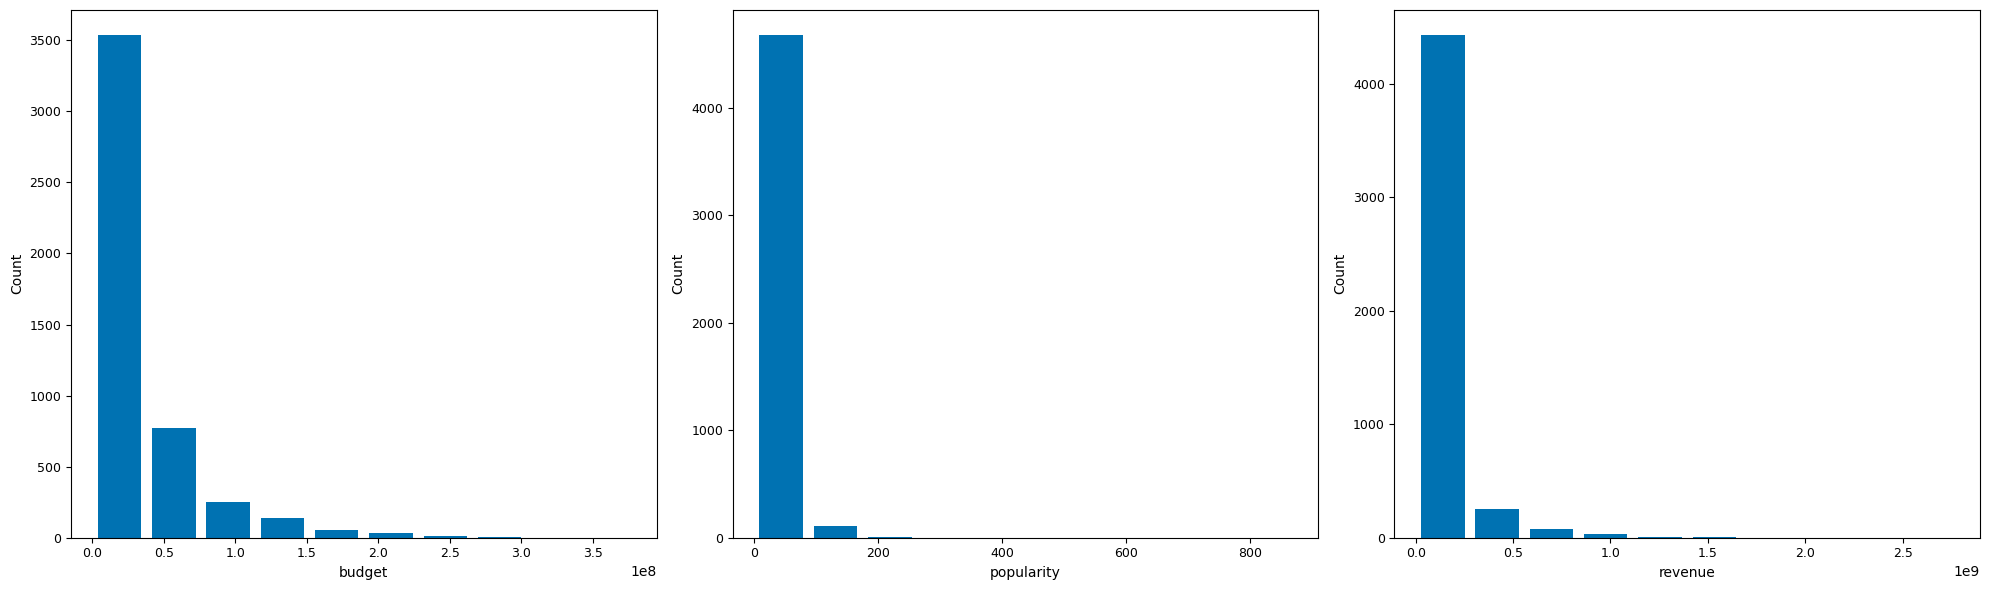

In [ ]:
plt = create_plot_to_analyze(df, 'histogram')
plt.show()

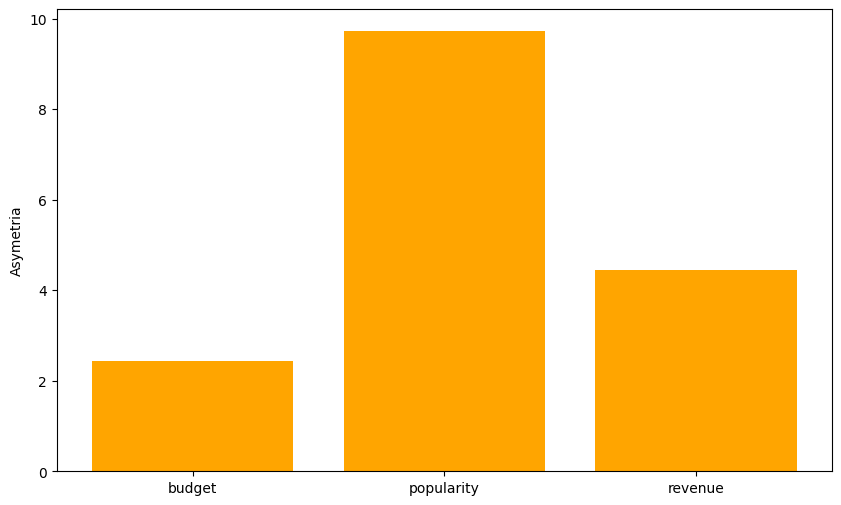

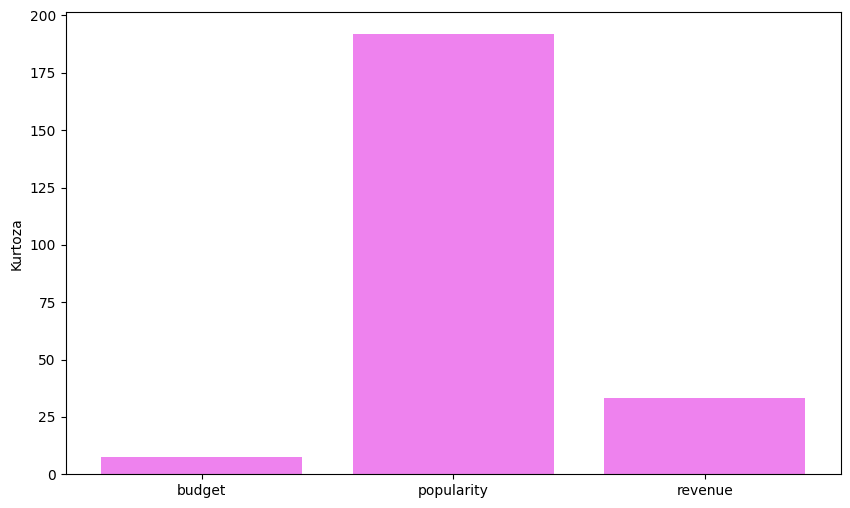

In [ ]:
skewness_values = []

for column in df.columns:
    skewness = skew(df[column])
    skewness_values.append((column, skewness))

skewness_df = pd.DataFrame(skewness_values, columns=['Column', 'Skewness'])

plt.figure(figsize=(10, 6))
plt.bar(skewness_df['Column'], skewness_df['Skewness'], color='orange')
plt.ylabel('Asymetria')
plt.show()


kurtosis_values = []
for column in df.columns:
    kurtosis_ = kurtosis(df[column])
    kurtosis_values.append((column, kurtosis_))

kurtosis_df = pd.DataFrame(kurtosis_values, columns=['Column', 'Kurtosis'])

plt.figure(figsize=(10, 6))
plt.bar(kurtosis_df['Column'], kurtosis_df['Kurtosis'], color='violet')
plt.ylabel('Kurtoza')
plt.show()


Rozkład jest asymetryczny prawostronnie, dla popularności wartość asymetrii jest najsilniejsza. Kurtozaa wskazuje także na fakt, że ogony rozkładu są ostre, szczególnie dla popularności.

<ipython-input-5-6ffd98a7acc5>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

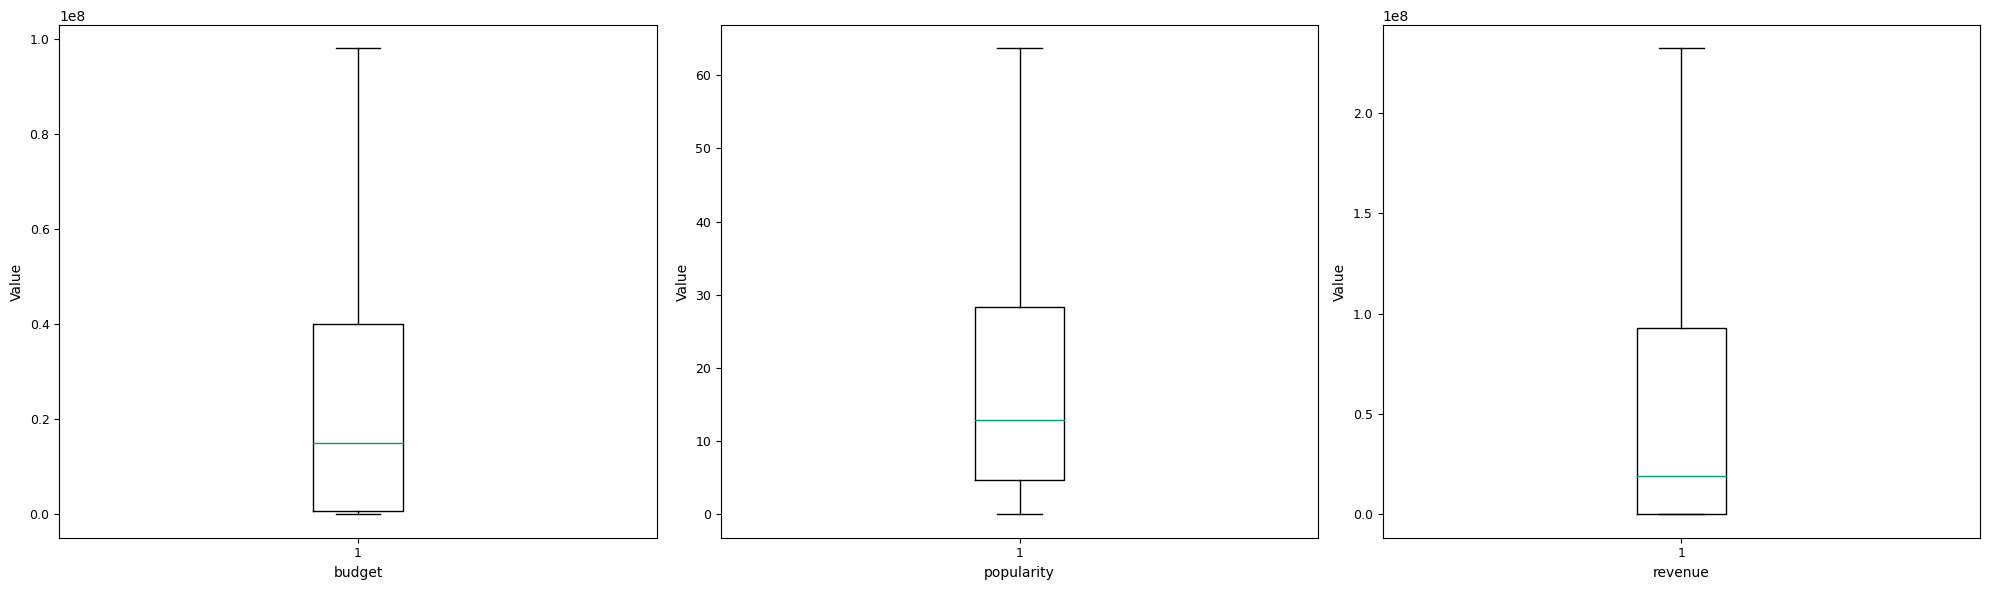

In [ ]:
create_plot_to_analyze(df, 'boxplot')

In [ ]:
summary_stats = df.describe(percentiles=[0.25, 0.75]).loc[['mean', '50%', '25%', '75%']].transpose()
summary_stats.columns = ['Mean', 'Median', 'Q1', 'Q3']

In [ ]:
summary_stats

,Mean,Median,Q1,Q3
budget,2.904504e+07,1.500000e+07,790000.00000,4.000000e+07
popularity,2.149230e+01,1.292159e+01,4.66807,2.831350e+01
revenue,8.226064e+07,1.917000e+07,0.00000,9.291719e+07


# Wstępne przetwarzanie danych

Wstępne przetwarzanie danych polegające na usunięciu wierszy w których wszystkie zmienne są 0, oraz gdzie budżet albo przychód wynoszą 0. Następnie usunięcie wartości odstających metodą IQR. W dalszym kroku dopasowano rozkład funkcją Boxcox, aby był normalnym rozkładem i ustandaryzowano dane.

<ipython-input-5-6ffd98a7acc5>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


Shapiro-Wilk test for budget: Statistic=0.9916666150093079, p-value=2.004404281441552e-11
The distribution of budget does not look normal (reject H0)
Shapiro-Wilk test for popularity: Statistic=0.995455801486969, p-value=2.2761606999210926e-07
The distribution of popularity does not look normal (reject H0)
Shapiro-Wilk test for revenue: Statistic=0.9858686327934265, p-value=8.470264886280775e-16
The distribution of revenue does not look normal (reject H0)


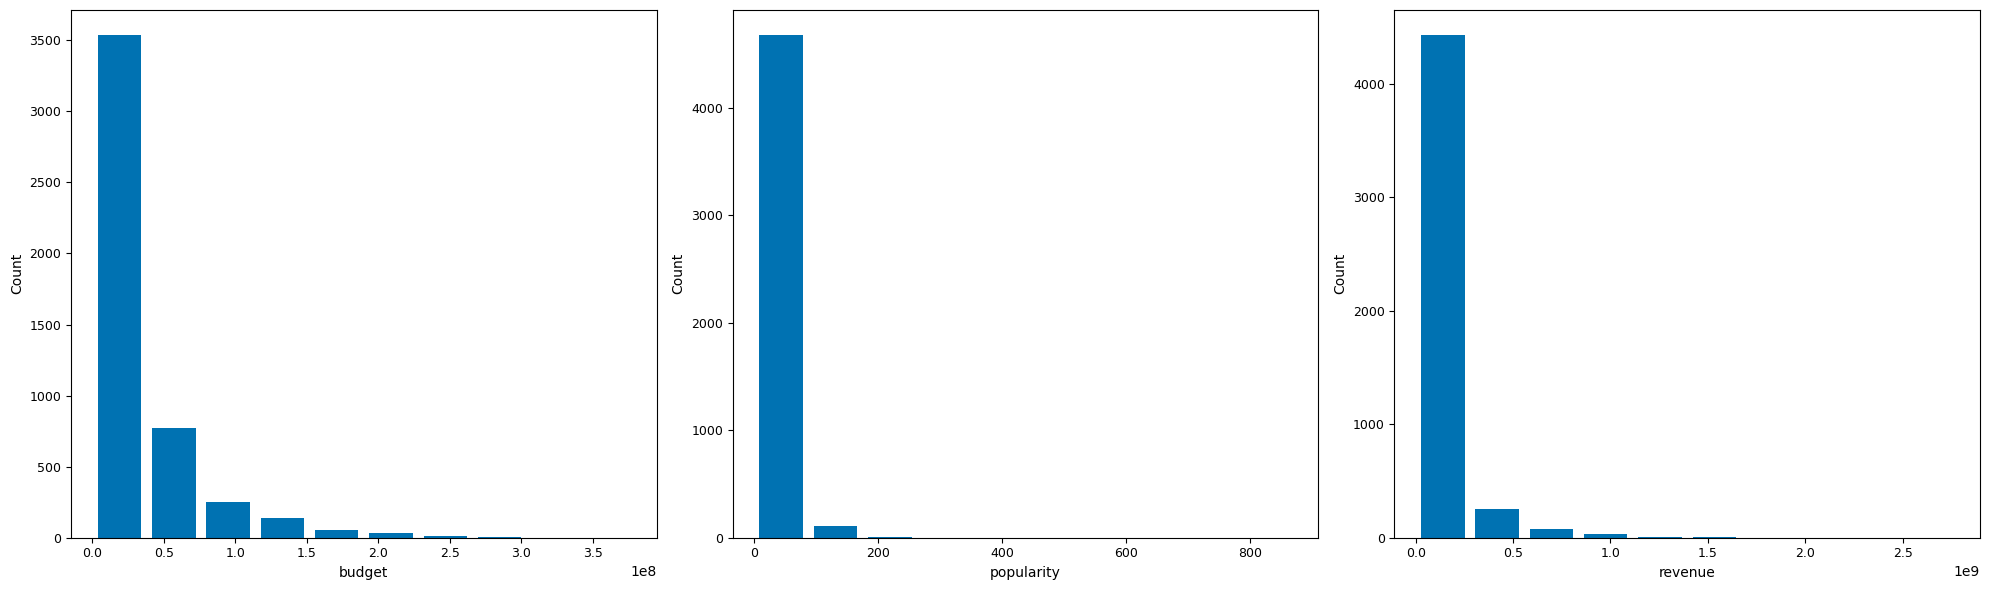

In [ ]:
create_plot_to_analyze(df, 'histogram')

# remove when all cols is zero and when revenue is 0
col_stat = ['budget', 'popularity', 'revenue']
df = df[(df[col_stat] != 0).any(axis=1)]
df = df[(df['revenue'] != 0)]
df = df[(df['budget'] != 0)]


# remove outliers
def remove_outliers_iqr(data, column, multiplier=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]


df = remove_outliers_iqr(df, 'budget')
df = remove_outliers_iqr(df, 'popularity')
df = remove_outliers_iqr(df, 'revenue')


for column in df.columns:
  df[column], lambda_value = boxcox(df[column] + 1e-6)

columns_to_test = ['budget', 'popularity', 'revenue']

for column in columns_to_test:
    stat, p_value = shapiro(df[column])
    print(f"Shapiro-Wilk test for {column}: Statistic={stat}, p-value={p_value}")

    alpha = 0.05
    if p_value > alpha:
        print(f"The distribution of {column} looks approximately normal (fail to reject H0)")
    else:
        print(f"The distribution of {column} does not look normal (reject H0)")



# standarize
df[col_stat] = StandardScaler().fit_transform(df[col_stat])



<ipython-input-5-6ffd98a7acc5>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


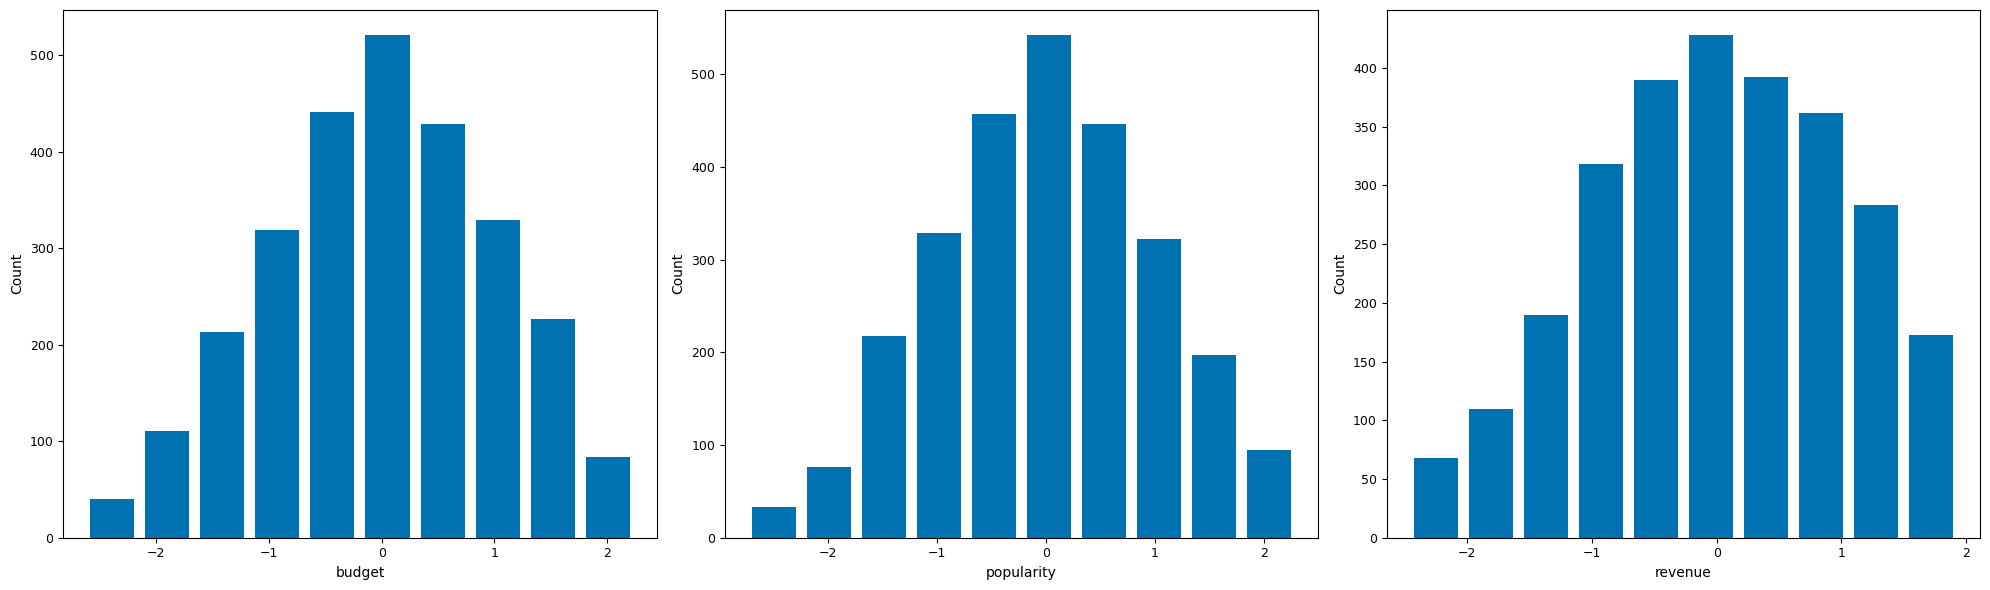

In [ ]:
plt = create_plot_to_analyze(df, 'histogram')
plt.show()


<ipython-input-5-6ffd98a7acc5>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

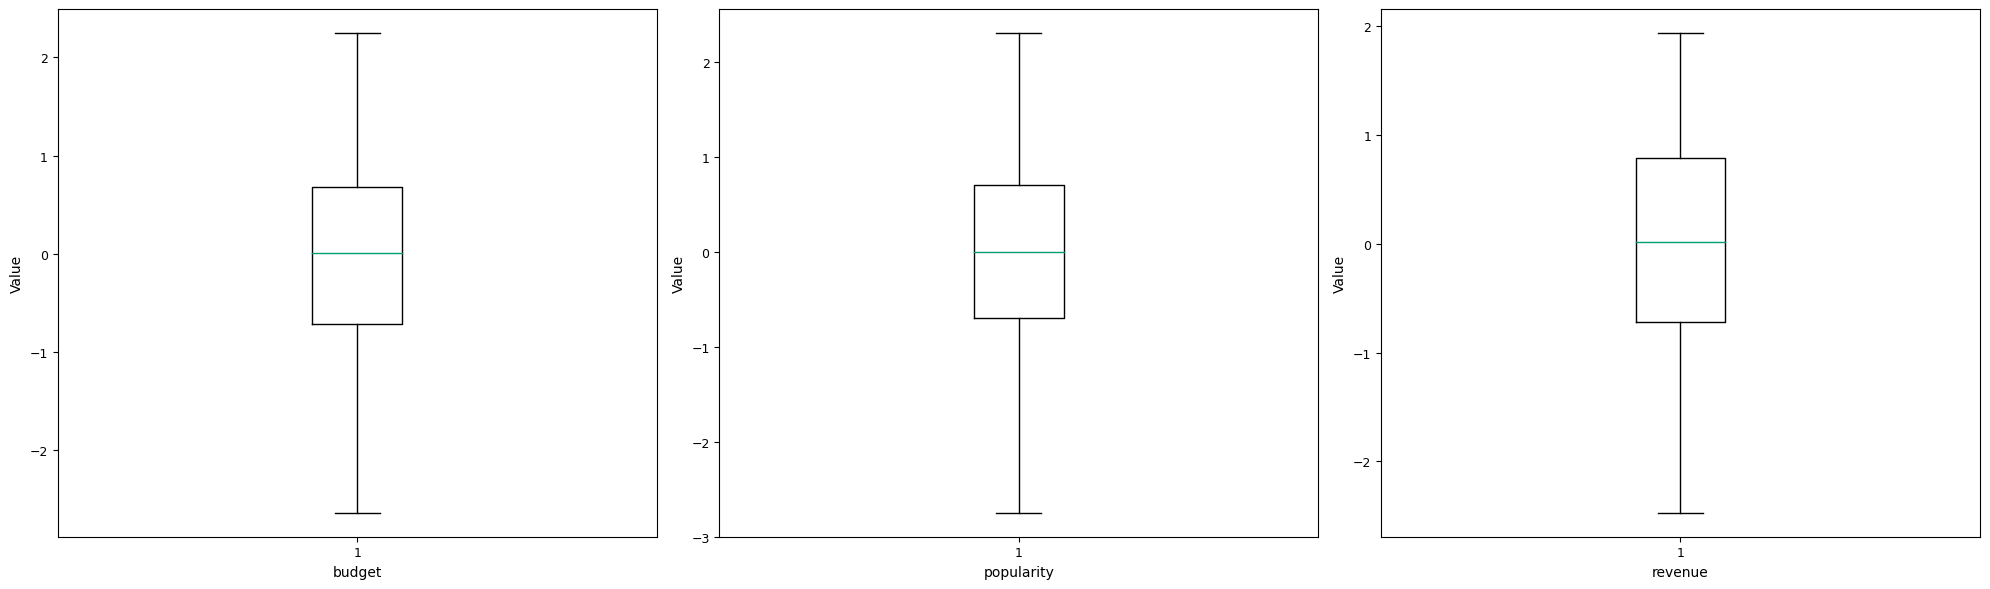

In [ ]:
create_plot_to_analyze(df, 'boxplot')

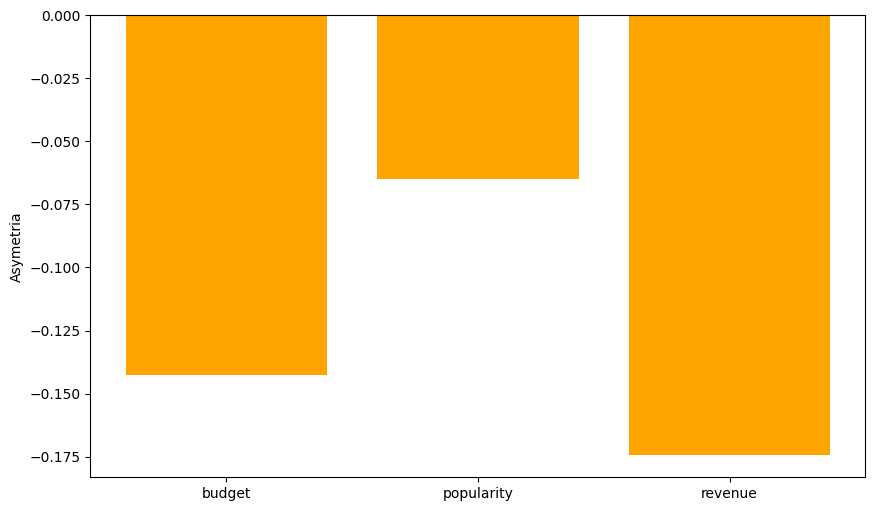

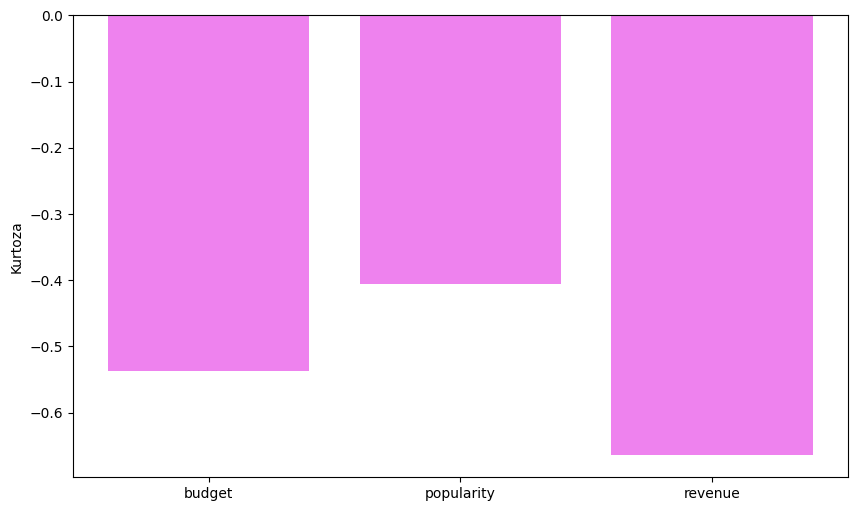

In [ ]:
skewness_values = []

for column in df.columns:
    skewness = skew(df[column])
    skewness_values.append((column, skewness))

skewness_df = pd.DataFrame(skewness_values, columns=['Column', 'Skewness'])

plt.figure(figsize=(10, 6))
plt.bar(skewness_df['Column'], skewness_df['Skewness'], color='orange')
plt.ylabel('Asymetria')
plt.show()


kurtosis_values = []
for column in df.columns:
    kurtosis_ = kurtosis(df[column])
    kurtosis_values.append((column, kurtosis_))

kurtosis_df = pd.DataFrame(kurtosis_values, columns=['Column', 'Kurtosis'])

plt.figure(figsize=(10, 6))
plt.bar(kurtosis_df['Column'], kurtosis_df['Kurtosis'], color='violet')
plt.ylabel('Kurtoza')
plt.show()

In [ ]:
summary_stats = df.describe(percentiles=[0.25, 0.75]).loc[['mean', '50%', '25%', '75%']].transpose()
summary_stats.columns = ['Mean', 'Median', 'Q1', 'Q3']

In [ ]:
summary_stats

,Mean,Median,Q1,Q3
budget,-1.675561e-16,0.005712,-0.716351,0.680052
popularity,1.047226e-16,0.001870,-0.702186,0.709033
revenue,-4.188903e-16,0.011933,-0.718653,0.786824


Z powyższej analizy, z wykonanego pairplotu cech można zauważyć, iż pomiędzy cechami zarysowuje się korelacja liniowa.

## Korelacja metodą Pearsona i Spearmana

Z wykorzystaniem wbudowanych funkcji pakieru pandas

In [ ]:
def correlation_analysis(df, **kwargs):
    correlation_matrix = df.corr(method=kwargs.get('method', 'pearson'))

    print("Wszystkie pary korelacji:\n")
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            col1, col2 = correlation_matrix.columns[i], correlation_matrix.columns[j]
            correlation_value = correlation_matrix.iloc[i, j]
            print(f"\t{col1} : {col2} - korelacja: {round(correlation_value, 3)}\n")

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='BuGn', fmt=".3f", linewidths=.5)
    plt.title('Macierz Korelacji')
    plt.show()

    return plt

Wszystkie pary korelacji:

	budget : popularity - korelacja: 0.344

	budget : revenue - korelacja: 0.6

	popularity : revenue - korelacja: 0.615



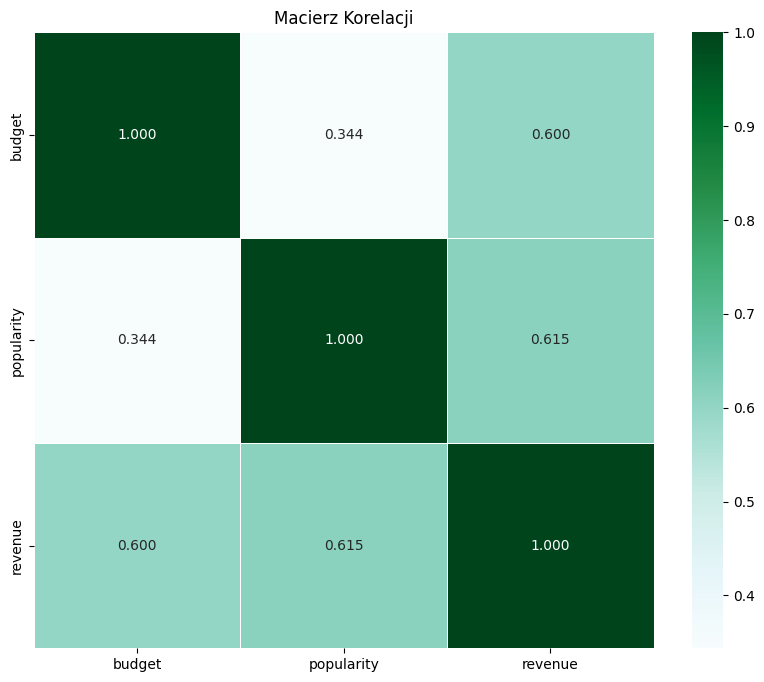

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [ ]:
correlation_analysis(df, method='pearson')

Wszystkie pary korelacji:

	budget : popularity - korelacja: 0.334

	budget : revenue - korelacja: 0.594

	popularity : revenue - korelacja: 0.618



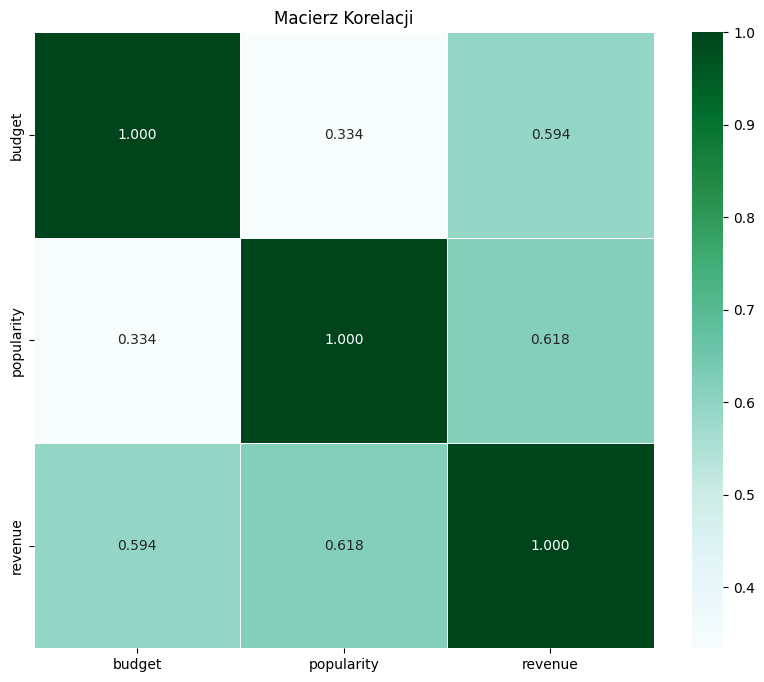

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [ ]:
correlation_analysis(df, method='spearman')

## Macierz kowariancji

              budget  popularity   revenue
budget      1.000369    0.343779  0.599776
popularity  0.343779    1.000369  0.615259
revenue     0.599776    0.615259  1.000369


Text(0.5, 1.0, 'Macierz kowariancji')

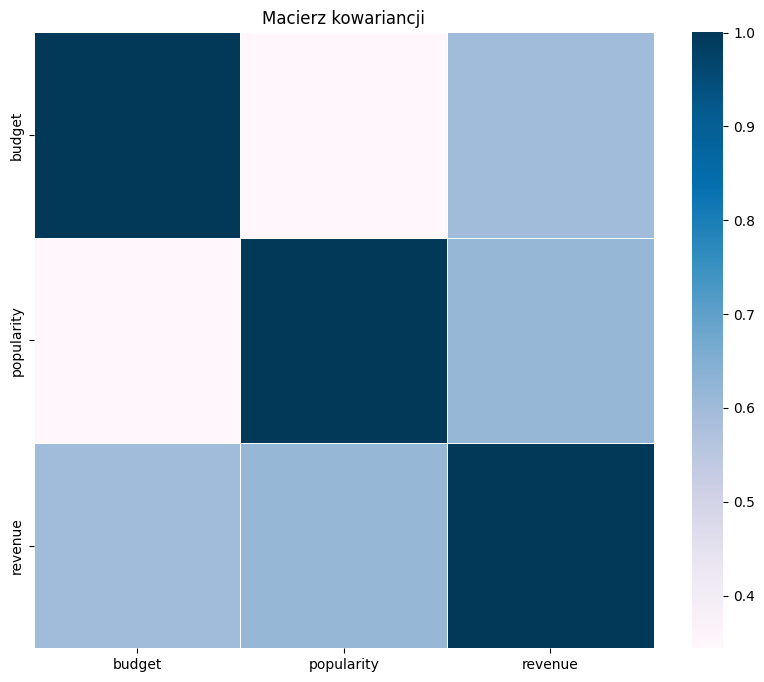

In [ ]:
covariance_matrix = df.cov()
print(covariance_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(covariance_matrix, annot=False, cmap='PuBu', fmt=".2f", linewidths=.5)
plt.title('Macierz kowariancji')



Elementy diagonalne reprezentują wariancje poszczególnych zmiennych.
Elementy poza przekątną reprezentują kowariancje między parami zmiennych. W tabeli widać, że istnieje silna dodatnia kowariancja między budżetem a przychodami. Oznacza to, że filmy z wyższym budżetem mają zazwyczaj wyższe przychody. Istnieje również dodatnia kowariancja między popularnością a przychodami. Oznacza to, że filmy, które są bardziej popularne, mają zwykle wyższe przychody. Zmienne mają także dużą wariancję, co świadczy o dużym rozrzucie danych.

# Dobranie współczynników regresji metodą najmniejszych kwadratów

#### Użycie całego zestawu danych do wyliczenia współczynników:

In [ ]:
# 1 metoda - użycie modułu scikit-learn

X = df[['budget', 'popularity']]  # Zmienne objaśniające (niezależne)
y = df['revenue']  # Zmienna objaśniana (zależna)

model_full = LinearRegression()
model_full.fit(X, y)

print("Przecięcie:", model_full.intercept_)
print("Współczynniki:", model_full.coef_)

Przecięcie: -3.937017312752223e-16
Współczynniki: [0.44018131 0.46376312]


In [ ]:
# 2 metoda - użycie modułu numpy

X_matrix = np.column_stack((np.ones(len(X)), X))
coefficients = np.linalg.lstsq(X_matrix, y, rcond=None)[0]

intercept, coef_budget, coef_popularity = coefficients
print("Przecięcie:", intercept)
print("Współczynnik (budżet):", coef_budget)
print("Współczynnik (popularność):", coef_popularity)

Przecięcie: -4.1982812979664246e-16
Współczynnik (budżet): 0.44018131045007935
Współczynnik (popularność): 0.4637631196127006


W modelu regresji liniowej równanie odnoszące zmienną zależną $(y)$ do zmiennych niezależnych $(X_1,X_2,\dots,X_k)$ można wyrazić jako:

$$y=\omega_0 +\omega_1⋅X_1+\omega_2⋅X_2+\cdots+\omega_k⋅X_k+\epsilon$$

Tutaj:

* $y$ to zmienna zależna (np. przychód).
* $\omega_0$ jest punktem przecięcia, reprezentującym wartość $y$, gdy wszystkie zmienne niezależne wynoszą zero.
* $\omega_1,\omega_2,\dots,\omega_k$ to współczynniki zmiennych niezależnych, reprezentujące zmianę $y$ dla jednostkowej zmiany każdej odpowiedniej zmiennej niezależnej.
* $X_1,X_2,\dots,X_k$ to zmienne niezależne.
εε to błąd, reprezentujący czynniki wpływające na $y$, które nie są uwzględnione w modelu.

W kontekście wielokrotnej regresji liniowej przy użyciu dwóch zmiennych niezależnych (budżet i popularność), równanie wygląda następująco:

$$R=\omega_0+\omega_{Budget}⋅B+\omega_{Popularity}⋅P+ε$$

Gdzie:
* R - revenue
* B - budget
* P - popularity

W naszym przypadku:
$$R=-4\cdot10^{-16}+0.44⋅B+0.46⋅P+ε$$


#### Podzielenie danych na zbiór danych treningowych i testujących.
Do wyznaczenia współczynników modelu (regresji) wykorzystanie tylko zbióru danych treningowych.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_train = LinearRegression()
model_train.fit(X_train, y_train)

print("Przecięcie (dane treningowe):", model_train.intercept_)
print("Współczynniki (dane treningowe):", model_train.coef_)

# Przetestowanie na danych testowych
y_pred_test = model_train.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)
print(f"MSE (Test): {mse_test}")

mae_test = mean_absolute_error(y_test, y_pred_test)
print(f"MAE (Test): {mae_test}")

Przecięcie (dane treningowe): 0.010269388349852854
Współczynniki (dane treningowe): [0.45699813 0.45585484]
MSE (Test): 0.48397476069983475
MAE (Test): 0.5539175984490434


### Nieliniowa regresja

In [ ]:
popularity = df['popularity']
budget = df['budget']
revenue = df['revenue']

def func_revenue(inputs, c1, c2, c3, c4, c5, c6):
    p, b = inputs
    return c1 * p**2 + c2 * p**2 * b + c3 * b**2 * p + c4 * p * b + c5 * b**2 + c6

params, covariance = curve_fit(func_revenue, [popularity, budget], revenue)

c1_opt, c2_opt, c3_opt, c4_opt, c5_opt, c6_opt = params

predicted_revenue = func_revenue([popularity, budget], c1_opt, c2_opt, c3_opt, c4_opt, c5_opt, c6_opt)

mae = mean_absolute_error(revenue, predicted_revenue)
print(f'Mean Absolute Error: {mae}')

mse = mean_squared_error(revenue, predicted_revenue)
print(f'Mean Squared Error: {mse}')

Mean Absolute Error: 0.6948150575839054
Mean Squared Error: 0.7312909338991697


In [ ]:
import numpy as np
import plotly.graph_objects as go

budget = df['budget']
popularity = df['popularity']
revenue = df['revenue']

budget_range = np.linspace(min(budget), max(budget), 100)
popularity_range = np.linspace(min(popularity), max(popularity), 100)
budget_mesh, popularity_mesh = np.meshgrid(budget_range, popularity_range)

intercept = model_train.intercept_
coef_budget = model_train.coef_[0]
coef_popularity = model_train.coef_[1]
revenue_pred = intercept + coef_budget * budget_mesh + coef_popularity * popularity_mesh

fig = go.Figure()

scatter = go.Scatter3d(
    x=budget,
    y=popularity,
    z=revenue,
    mode='markers',
    marker=dict(size=5, color=revenue, colorscale='viridis'),
    name='Dane'
)
fig.add_trace(scatter)

surface = go.Surface(
    x=budget_mesh,
    y=popularity_mesh,
    z=revenue_pred,
    colorscale='viridis',
    opacity=0.6,
    name = "Płaszczyzna regresji"

)
fig.add_trace(surface)

fig.update_layout(
    scene=dict(
        xaxis_title='Budżet',
        yaxis_title='Popularność',
        zaxis_title='Przychód',
        camera=dict(eye=dict(x=1.9, y=1.5, z=0.2)),
    ),
    coloraxis=dict(colorbar=dict(title='Przewidywany przychód', tickformat=",.0e")),
    margin=dict(t=0,b=0,l=0,r=0)
)

fig.show()
#revenue zaaklocac

## Korzystając ze zbioru treningowego wyznaczenie parametrów modeli: regresji, regresji grzbietowej, regresji z regularyzacją LASSO. Sprawdzenie wpływu regularyzacji (dobór odpowiedniego hiperparametru)

In [ ]:
# Standaryzacja cech dla regresji grzbietowej i LASSO
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# 1. Regresja
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Regresja liniowa MSE: {mse_linear}")
print("Współczynniki:", model_linear.coef_)
print("Przecięcie:", model_linear.intercept_)
print("\n")

# 2. Regresja grzebitowa z Grid Search'em do odpowiedniego dopasowania hiperparametrów
ridge_params = {'alpha': list(range(1,10,1))}
model_ridge = Ridge()
grid_ridge = GridSearchCV(model_ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
grid_ridge.fit(X_train_standardized, y_train)

best_alpha_ridge = grid_ridge.best_params_['alpha']
model_ridge_best = Ridge(alpha=best_alpha_ridge)
model_ridge_best.fit(X_train_standardized, y_train)
y_pred_ridge = model_ridge_best.predict(X_test_standardized)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Regresja grzebitowa MSE: {mse_ridge}")
print(f"Najlepsza wartość alpha dla regresji grzebitowej: {best_alpha_ridge}")
print("Współczynniki:", model_ridge_best.coef_)
print("Przecięcie:", model_ridge_best.intercept_)
print("\n")


# 3. Regresja LASSO z Grid Search'em do odpowiedniego dopasowania hiperparametrów
lasso_params = {'alpha': [i*0.001 for i in range(1,1000,10)]}
model_lasso = Lasso()
grid_lasso = GridSearchCV(model_lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
grid_lasso.fit(X_train_standardized, y_train)

best_alpha_lasso = grid_lasso.best_params_['alpha']
model_lasso_best = Lasso(alpha=best_alpha_lasso)
model_lasso_best.fit(X_train_standardized, y_train)
y_pred_lasso = model_lasso_best.predict(X_test_standardized)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Regresja LASSO MSE: {mse_lasso}")
print(f"Najlepsza wartość alpha dla regresji LASSO: {best_alpha_lasso}")
print("Współczynniki:", model_lasso_best.coef_)
print("Przecięcie:", model_lasso_best.intercept_)
print("\n")


Regresja liniowa MSE: 0.48397476069983475
Współczynniki: [0.45699813 0.45585484]
Przecięcie: 0.010269388349852854


Regresja grzebitowa MSE: 0.48393756680682637
Najlepsza wartość alpha dla regresji grzebitowej: 2
Współczynniki: [0.45486826 0.45655354]
Przecięcie: 0.011926339557675702


Regresja LASSO MSE: 0.4838870331152414
Najlepsza wartość alpha dla regresji LASSO: 0.001
Współczynniki: [0.45443589 0.45611968]
Przecięcie: 0.011926339557675702




## Zaszumianie białym szumem

Linear Regression MSE: 0.4874406858073451
Ridge Regression MSE: 0.4867746432945455
Najlepsza wartość alpha dla regresji grzebitowej: 50
LASSO Regression MSE: 0.48682349913299144
Najlepsza wartość alpha dla regresji LASSO: 0.01


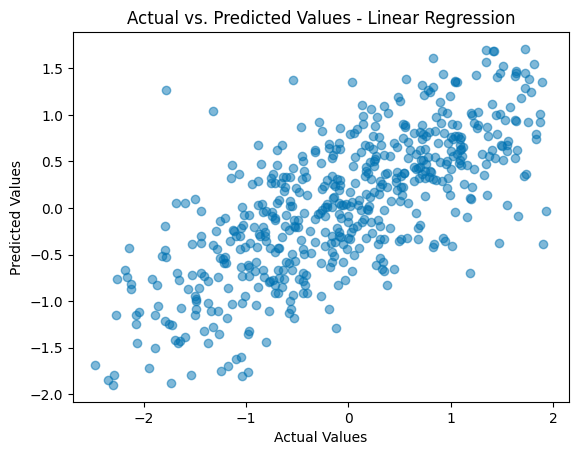

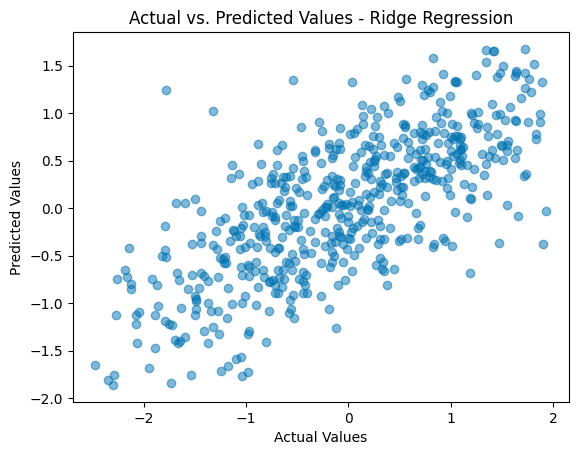

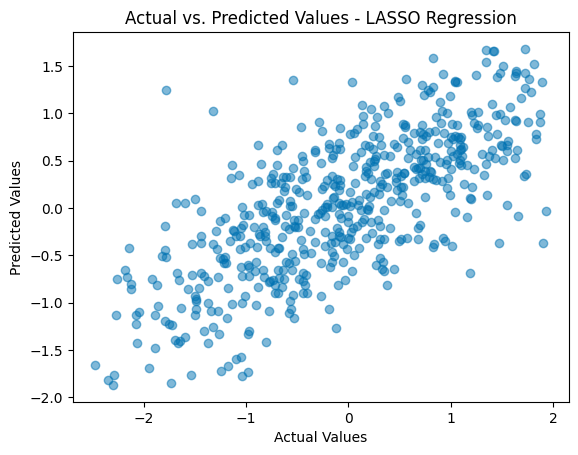

In [ ]:
np.random.seed(42)
noise_stddev = 1
y_train_perturbed = y_train + np.random.normal(0, noise_stddev, size=len(y_train))

# Linear Regression
model_linear = LinearRegression()
model_linear.fit(X_train_standardized, y_train_perturbed)
y_pred_linear = model_linear.predict(X_test_standardized)

mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)


print(f"Linear Regression MSE: {mse_linear}")

# Ridge Regression
ridge_params = {'alpha': list(range(50,100,5))}
model_ridge = Ridge()
grid_ridge = GridSearchCV(model_ridge, ridge_params, cv=10, scoring='neg_mean_squared_error')
grid_ridge.fit(X_train_standardized, y_train_perturbed)

best_alpha_ridge = grid_ridge.best_params_['alpha']
model_ridge_best = Ridge(alpha=60)
model_ridge_best.fit(X_train_standardized, y_train_perturbed)
y_pred_ridge = model_ridge_best.predict(X_test_standardized)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print(f"Ridge Regression MSE: {mse_ridge}")
print(f"Najlepsza wartość alpha dla regresji grzebitowej: {best_alpha_ridge}")


# LASSO Regression
lasso_params = {'alpha': [i*0.01 for i in range(1,1000,100)]}
model_lasso = Lasso()
grid_lasso = GridSearchCV(model_lasso, lasso_params, cv=10, scoring='neg_mean_squared_error')
grid_lasso.fit(X_train_standardized, y_train_perturbed)

best_alpha_lasso = grid_lasso.best_params_['alpha']
model_lasso_best = Lasso(alpha=best_alpha_lasso)
model_lasso_best.fit(X_train_standardized, y_train_perturbed)
y_pred_lasso = model_lasso_best.predict(X_test_standardized)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print(f"LASSO Regression MSE: {mse_lasso}")
print(f"Najlepsza wartość alpha dla regresji LASSO: {best_alpha_lasso}")


# Plot actual vs. predicted values for Linear Regression
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.title('Actual vs. Predicted Values - Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Plot actual vs. predicted values for Ridge Regression
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.title('Actual vs. Predicted Values - Ridge Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Plot actual vs. predicted values for LASSO Regression
plt.scatter(y_test, y_pred_lasso, alpha=0.5)
plt.title('Actual vs. Predicted Values - LASSO Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

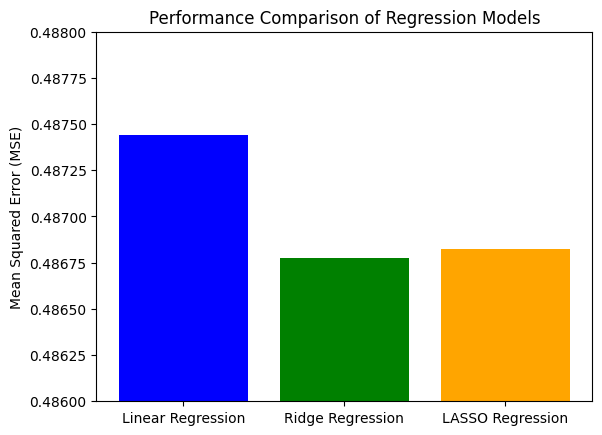

In [ ]:
models = ['Linear Regression', 'Ridge Regression', 'LASSO Regression']
mse_values = [mse_linear, mse_ridge, mse_lasso]
mae_values = [mae_linear, mae_ridge, mae_lasso]


# Bar plot for MSE comparison
plt.bar(models, mse_values, color=['blue', 'green', 'orange'])
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Performance Comparison of Regression Models')
plt.ylim([0.486,0.488])
plt.show()


# kNN (k - najbliższych sąsiadów)


kNN Regression MSE: 0.5389578824593024
Best value for k in kNN: 9


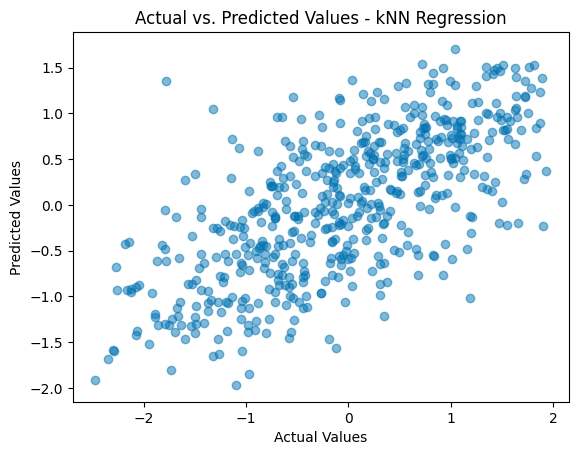

Optimal Parameters:
{'n_neighbors': 9}


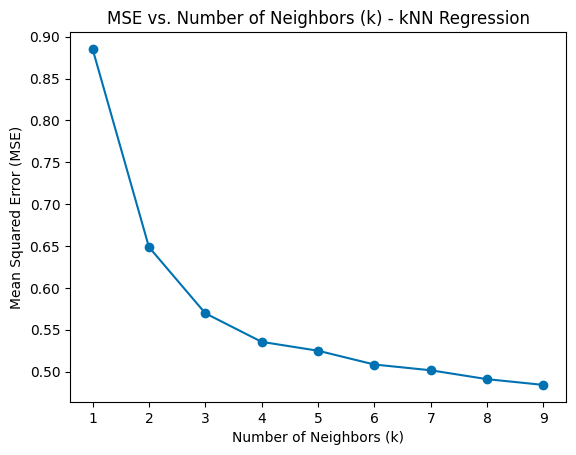

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_params = {'n_neighbors': list(range(1, 10))}
model_knn = KNeighborsRegressor()
grid_knn = GridSearchCV(model_knn, knn_params, cv=5, scoring='neg_mean_squared_error')
grid_knn.fit(X_train, y_train)

best_k_knn = grid_knn.best_params_['n_neighbors']
model_knn_best = KNeighborsRegressor(n_neighbors=best_k_knn)
model_knn_best.fit(X_train, y_train)
y_pred_knn = model_knn_best.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"kNN Regression MSE: {mse_knn}")
print(f"Best value for k in kNN: {best_k_knn}")

plt.scatter(y_test, y_pred_knn, alpha=0.5)
plt.title('Actual vs. Predicted Values - kNN Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

print("Optimal Parameters:")
print(grid_knn.best_params_)

cv_results = grid_knn.cv_results_
k_values = [param['n_neighbors'] for param in cv_results['params']]
mse_values = -cv_results['mean_test_score']

plt.plot(k_values, mse_values, marker='o')
plt.title('MSE vs. Number of Neighbors (k) - kNN Regression')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

### K-Nearest Neighbors (kNN):

#### Zasada działania:
k-Nearest Neighbors (kNN) to algorytm uczenia maszynowego, który działa zarówno w zadaniach klasyfikacji, jak i regresji. W przypadku regresji, kNN przewiduje wartość nowego punktu danych na podstawie średniej (lub mediany) wartości jego k najbliższych sąsiadów.

1. **Kroki Algorytmu:**
   - Obliczanie odległość między punktem testowym a wszystkimi punktami treningowymi (np. używając odległości euklidesowej).
   - Wybranie k najbliższych sąsiadów.
   - Przewinięcie wartości zmiennych zależnych k sąsiadów (np. przy użyciu średniej lub mediany) i przypisanie tę wartość jako przewidywaną dla punktu testowego.

#### Parametry i hiperparametry:
- **Liczba Sąsiadów (k):** Parametr k określa, ile sąsiadów należy uwzględnić przy prognozowaniu. Optymalna wartość k może być wybierana za pomocą kroswalidacji.
  
#### Dobór i znaczenie parametrów:
- **Liczba Sąsiadów (k):**
  - Wybór odpowiedniej liczby sąsiadów zależy od charakterystyki danych. Przy małej wartości k, model może być bardziej podatny na szumy, a przy dużej wartości k, model może być mniej elastyczny.
  - Należy unikać parzystej liczby sąsiadów, aby uniknąć sytuacji, gdy istnieje remis między dwoma klasami.

### Dobór hiperparametrów dla kNN:

Dobór optymalnych hiperparametrów w kNN można przeprowadzono za pomocą kroswalidacji (Cross-Validation), aby znaleźć takie wartości, które zapewnią najlepszą ogólną zdolność uogólniania modelu.

#### Wnioski:
1. Wybór liczby sąsiadów (k) ma kluczowe znaczenie. Warto eksperymentować z różnymi wartościami k i monitorować, jakie efekty przynosi to dla jakości modelu.
2. KNN jest wrażliwy na skale zmiennych, dlatego warto przeprowadzić standaryzację zmiennych przed zastosowaniem algorytmu.
3. Zastosowanie kNN może być korzystne w sytuacjach, gdy struktura danych jest nieliniowa i skomplikowana.
4. Grid search w połączeniu z kroswalidacją jest efektywnym narzędziem do optymalizacji hiperparametrów.

SVM Regression MSE: 0.4952616926864104
Best kernel: rbf, Best C: 0.5, Best epsilon: 0.2


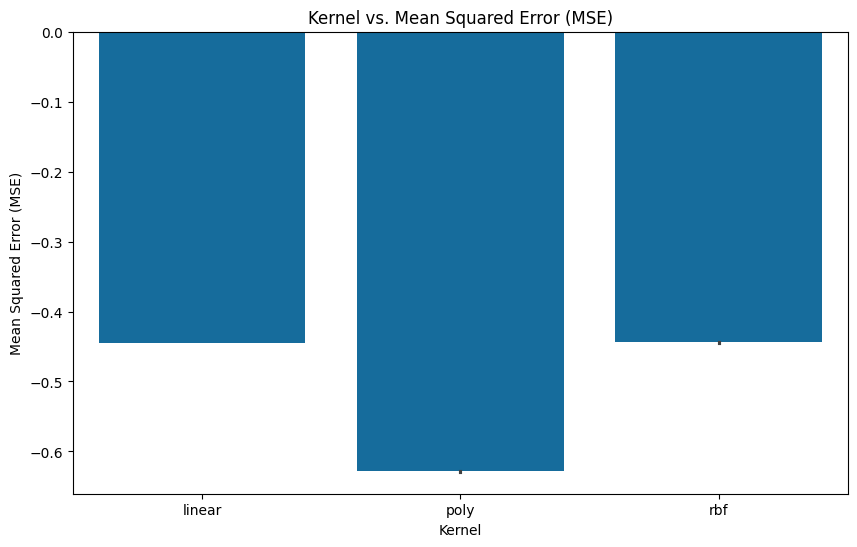

In [ ]:
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.2, 0.5, 1, 2],
    'epsilon': [0.01, 0.1, 0.2, 0.3]
}

svm_model = SVR()
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_kernel = grid_search.best_params_['kernel']
best_C = grid_search.best_params_['C']
best_epsilon = grid_search.best_params_['epsilon']

best_svm_model = SVR(kernel=best_kernel, C=best_C, epsilon=best_epsilon)

best_svm_model.fit(X_train, y_train)

y_pred_svm = best_svm_model.predict(X_test)

mse_svm = mean_squared_error(y_test, y_pred_svm)
print(f"SVM Regression MSE: {mse_svm}")
print(f"Best kernel: {best_kernel}, Best C: {best_C}, Best epsilon: {best_epsilon}")

results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(10, 6))
sns.barplot(x='param_kernel', y='mean_test_score', data=results)
plt.title('Kernel vs. Mean Squared Error (MSE)')
plt.xlabel('Kernel')
plt.ylabel('Negative Mean Squared Error (MSE)')
plt.show()


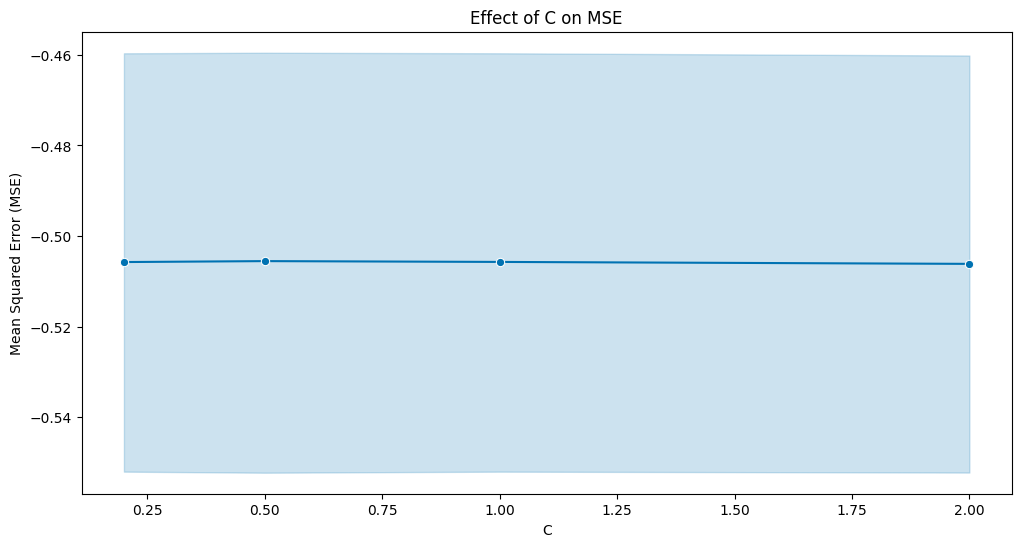

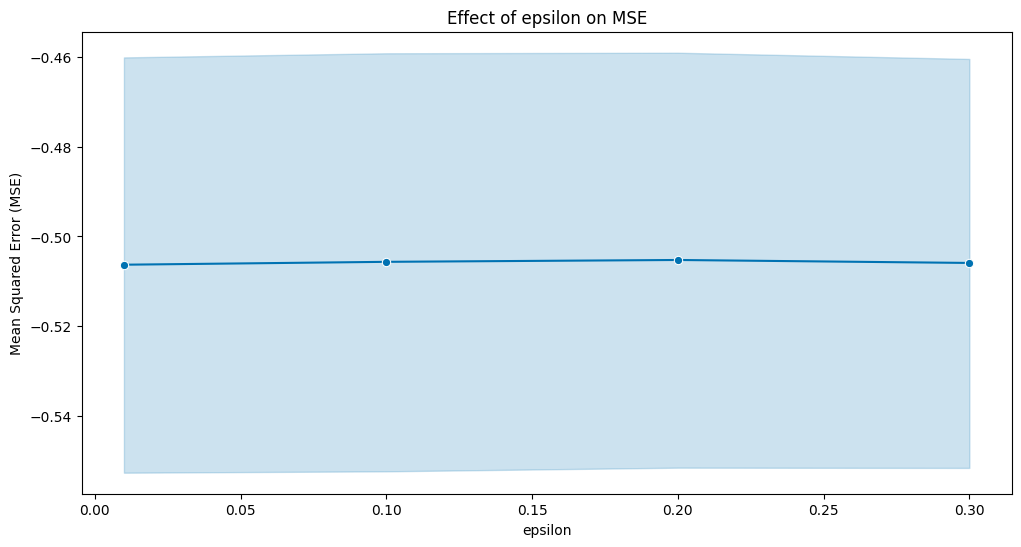

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='param_C', y='mean_test_score', data=results, marker='o')
plt.title('Effect of C on MSE')
plt.xlabel('C')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='param_epsilon', y='mean_test_score', data=results, marker='o')
plt.title('Effect of epsilon on MSE')
plt.xlabel('epsilon')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

### Maszyna Wektorów Nośnych (SVM) w Zadaniu Regresji:

#### Zasada Działania:
Maszyna Wektorów Nośnych (SVM) to algorytm uczenia maszynowego stosowany zarówno w zadaniach klasyfikacji, jak i regresji. W kontekście regresji, SVM dąży do znalezienia hiperpłaszczyzny, która maksymalizuje margines (dystans pomiędzy hiperpłaszczyzną a najbliższymi punktami danych) pomiędzy danymi treningowymi a przewidywanymi wartościami. Punkty treningowe, które leżą na marginesie, są nazywane wektorami nośnymi.

1. **Kroki Algorytmu:**
   - Przetwarzanie danych treningowych w przestrzeni wielowymiarowej.
   - Znalezienie hiperpłaszczyzny (lub funkcji) optymalnie rozdzielającą dane.
   - Minimalizacja błędu regresji, jednocześnie maksymalizując margines między danymi treningowymi a hiperpłaszczyzną.

#### Parametry i Hiperparametry:
- **Kernel (Jądro):** Określa funkcję, która transformuje dane wejściowe do przestrzeni wielowymiarowej. Popularne jądra to liniowe, wielomianowe i radialne (RBF).
- **C (Parametr Kary za Błąd):** Kontroluje wagę pomiędzy minimalizacją błędu treningowego a maksymalizacją marginesu. Wartość C reguluje poziom dopasowania modelu do danych treningowych.
- **epsilon (Początkowa Tolerancja Błędu):** Parametr używany w regresji SVM do określenia dopuszczalnego błędu dopasowania dla każdego punktu danych.

#### Dobór i Znaczenie Parametrów:
- **Kernel (Jądro):** Wybór jądra zależy od struktury danych. Jądro RBF jest popularne, gdy dane są nieliniowe, podczas gdy jądro liniowe może być skuteczne dla danych liniowych.
- **C (Parametr Kary za Błąd):** Wartość C powinna być dostosowana w zależności od elastyczności modelu. Wartość większa doprowadzi do bardziej dopasowanego modelu, ale może prowadzić do overfittingu.


#### Wnioski:
1. **Kernel (Jądro):**

   - **RBF (Radial Basis Function):** Najlepiej sprawdziło się jądro RBF.Powszechnie używane dla danych nieliniowych.
2. **Parametr Kary za Błąd (C):**
   - Wartość C=0.5 oznacza, że model ma pewną elastyczność w dopasowywaniu się do danych
3. **Epsilon**:
  - Wartość epsilon=0.2 oznacza, że modele z błędem większym niż 0.2 są karane, co może pomóc w ograniczeniu wpływu wartości odstających.


In [ ]:
model_tree = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 8, 10],
    'min_samples_split': [2,3,4, 5,8, 10]
}

grid_search = GridSearchCV(model_tree, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best fit: {best_params}")

best_model = grid_search.best_estimator_
y_pred_tree = best_model.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f"MSE: {mse_tree}")

Best fit: {'max_depth': 4, 'min_samples_split': 2}
MSE: 0.5237444053424546


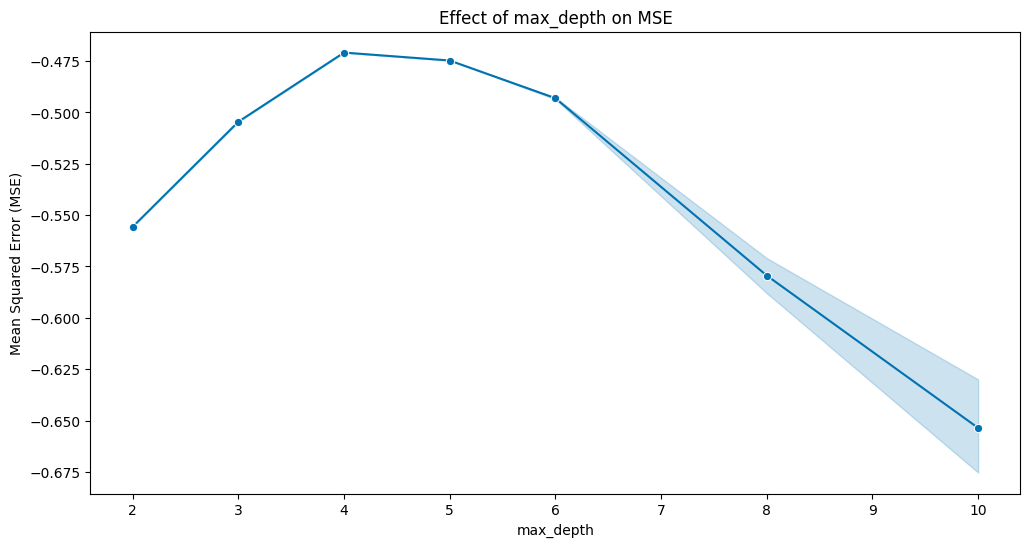

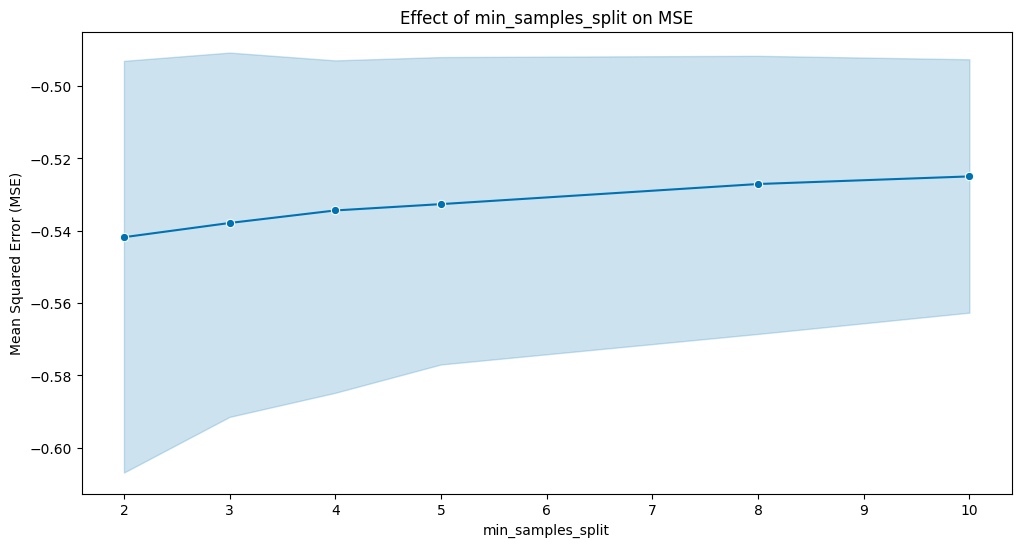

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(12, 6))
sns.lineplot(x='param_max_depth', y='mean_test_score', data=results, marker='o')
plt.title('Effect of max_depth on MSE')
plt.xlabel('max_depth')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='param_min_samples_split', y='mean_test_score', data=results, marker='o')
plt.title('Effect of min_samples_split on MSE')
plt.xlabel('min_samples_split')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

#### **Regression Tree**

Drzewo decyzyjne to nieliniowy algorytm uczenia maszynowego wykorzystywany zarówno do zadań klasyfikacji, jak i regresji. W kontekście regresji często nazywane jest właśnie regression tree. Składa się z węzłów, gdzie każdy węzeł wewnętrzny reprezentuje decyzję opartą na cechach, każda gałąź reprezentuje wynik tej decyzji, a każdy liść oznacza ostateczną prognozę.


**1. Proces Decyzyjny:**
   - **Kryterium Podziału:** Drzewo decyzyjne dokonuje decyzji poprzez rekurencyjne dzielenie zbioru danych na podstawie cech. Celem jest minimalizacja wariancji zmiennej docelowej w każdym podziale.
   - **Proces Podziału:** W każdym węźle algorytm wybiera cechę i punkt podziału, który najlepiej separuje dane zgodnie z kryterium podziału (często jest to błąd średniokwadratowy w regresji).
   - **Kryteria Zatrzymywania:** Drzewo kontynuuje podział, aż zostanie spełniony określony warunek zatrzymania, takie jak osiągnięcie maksymalnej głębokości, osiągnięcie minimalnej liczby próbek w liściu lub brak dalszej poprawy w redukcji wariancji.

Po zbudowaniu drzewa, przewidywanie dla nowego punktu danych polega na śledzeniu decyzji od korzenia do odpowiedniego liścia.
Przewidywana wartość regresji to średnia wartość docelowa w liściu.

**2. Hiperparametry:**
   - **Głębokość Drzewa:** Maksymalna liczba poziomów drzewa.
   - **Minimalna Liczba Próbek w Liściu:** Minimalna liczba próbek wymagana do utworzenia liścia.

Zaletami drzewa decyzyjnego są interpretowalność, łatwość wizualizacji, zdolność do obsługi nieliniowych zależności.Wadami - skłonność do przetrenowania, szczególnie w przypadku zbyt dużego drzewa.

W tym przypadku najlepsze dopasowanie wskazuje, że optymalna głębokość drzewa wynosi 4. To oznacza, że drzewo będzie miało maksymalnie 4 poziomy decyzji od korzenia do liści. Dla najlepszego dopasowania minimalna liczba próbek wymagana do utworzenia nowego liścia wynosi 2, co oznacza, że drzewo będzie dzielić węzły, tylko jeśli w danym węźle jest co najmniej 2 próbki.




Best fit: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Gradient Boosting Regression MSE: 0.48952467127315713


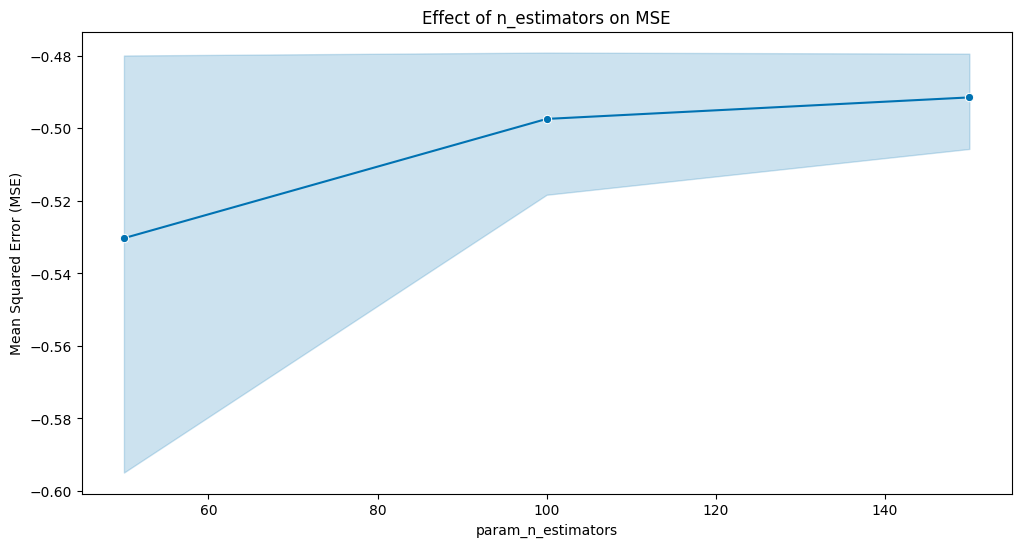

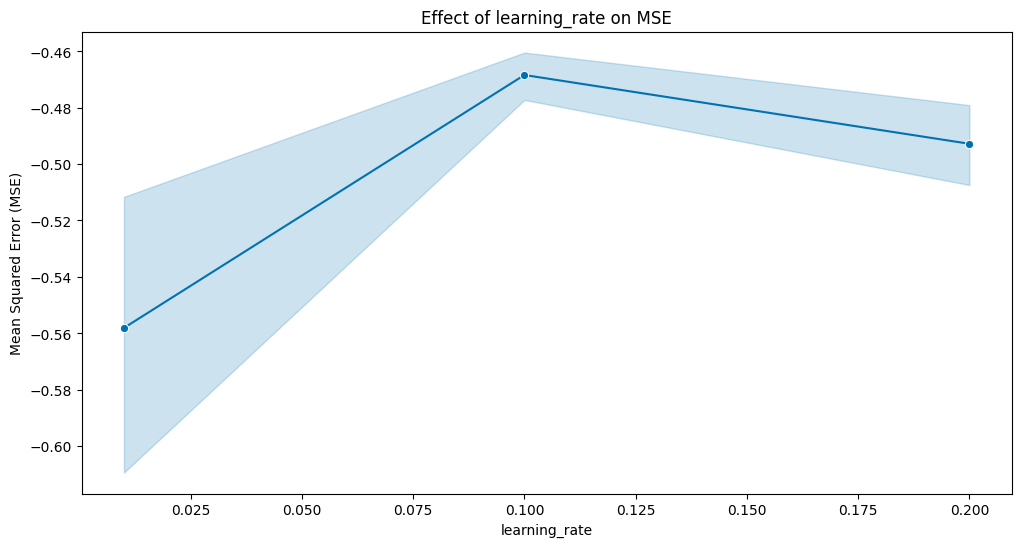

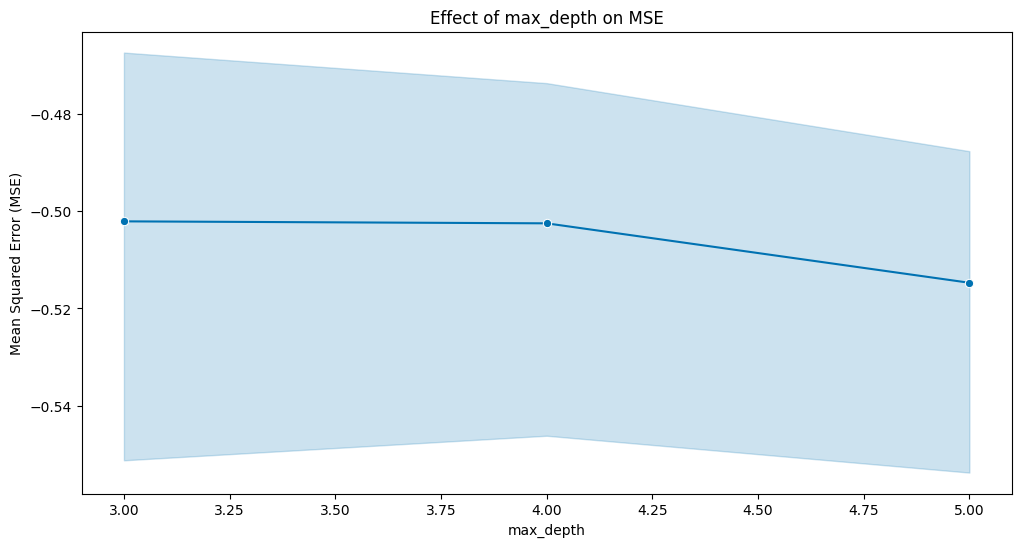

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

gb_regressor = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(gb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best fit:", best_params)

best_gb_model = grid_search.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f"Gradient Boosting Regression MSE: {mse_gb}")

results = pd.DataFrame(grid_search.cv_results_)
hyperparams = ['param_n_estimators', 'param_learning_rate', 'param_max_depth']
hyperparams_and_mse = results[hyperparams + ['mean_test_score']]

plt.figure(figsize=(12, 6))
sns.lineplot(x='param_n_estimators', y='mean_test_score', data=results, marker='o')
plt.title('Effect of n_estimators on MSE')
plt.xlabel('param_n_estimators')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='param_learning_rate', y='mean_test_score', data=results, marker='o')
plt.title('Effect of learning_rate on MSE')
plt.xlabel('learning_rate')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='param_max_depth', y='mean_test_score', data=results, marker='o')
plt.title('Effect of max_depth on MSE')
plt.xlabel('max_depth')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

Dla algorytmu Gradient Boosting Regressor najlepszy okazał się następujący zestaw parametrów:
('learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50)

* n_estimators: Określa liczbę drzew decyzyjnych (estymatorów), które mają być dodane do modelu w procesie boosting. W większości przypadków większa liczba estymatorów może poprawić wydajność modelu, ale wymaga również więcej zasobów obliczeniowych.

* learning_rate: Wpływa na skok, czyli skorygowaną wartość przewidywaną przez każdy nowy model. Niski współczynnik uczenia wymaga zazwyczaj większej liczby estymatorów, aby uzyskać podobną wydajność.

* max_depth: Maksymalna głębokość każdego drzewa decyzyjnego. Kontroluje złożoność każdego drzewa w ansamblu.


# Wnioski

#### Analiza datasetu

W pierwszym kroku przeprowadzono analizę statystyczną zbioru, pokazano podstawowe infromacje o zbiorze takie jak mediana, kwartyle, średnia, minimum i maksimum dla każdej ze zmiennych. Przeanalizowano także rozkład danych przy pomocy histogramu oraz boxplotu. Dodatkowo zbadano asymetrię - dane wykazywały silną asymetrię prawostronną.

Dane następnie przygotowano do regresji. Usunięto wadliwe wartości, a także wartości odstające. Znormalizowano rozkład - przeprowadzono potem test normalności Shapiro-Wilka - mimo, że rozkład wydaje się normalny, test wskazał na odwrotną właściwość - p-value mniejsze niż 0.05. Następnie przprowadzono standaryzację. Finalnie otrzymano dosyć dobrej jakości wyniki.



---



#### Korelacja i kowariancja

Przeprowazdono testy korelacji metodą Spearmana i Pearsona - w obu metodach korelacja pomiędzy przychodem a budżetem oraz przychodem a popularnością jest dosyć dobrze zarysowana - wynosi ponad 0.6. Wskazuje to na zależność od siebie tych zmiennych.

Istnieje silna dodatnia kowariancja między budżetem a przychodami. Oznacza to, że filmy z wyższym budżetem mają zazwyczaj wyższe przychody. Istnieje również dodatnia kowariancja między popularnością a przychodami. Oznacza to, że filmy, które są bardziej popularne, mają zwykle wyższe przychody. Zmienne mają także dużą wariancję, co świadczy o dużym rozrzucie danych.

---

#### Regresja

Dobrano współczynniki regresji na 2 główne sposoby:
 1. Korzystając z całego zbioru
 2. Dzieląc zbiór na treningowy i testowy

Szczegółowa analiza sposobu 1 regresjii znajduje się w komórce [23](#scrollTo=mY-gXmspZsDw&line=23&uniqifier=1).
W 2 sposobie uzyskano ponizsze wyniki:

    Przecięcie (dane treningowe): 0.010269388349852854
    Współczynniki (dane treningowe): [0.45699813 0.45585484]
    MSE (Test): 0.48397476069983475
    MAE (Test): 0.5539175984490434

Jak widać, MSE oraz MAE mają w stosunku do danych dosyć duże wartości - wynika to z dużego rozrzutu danych, przez co idealne dopasowanie regresją liniową jest niemożliwe. Zastosowano zastem regersję nieliniową stosując wzór:

$$R = \omega_1 \cdot P^2 + \omega_2  \cdot P^2 \cdot B + \omega_3 \cdot B^2 \cdot P + \omega_4 \cdot P \cdot B + \omega_5 \cdot B^2 + \omega_6$$

Gdzie:
* $R$ - revenue
* $B$ - budget
* $P$ - popularity
* $\omega_k$ - współczynniki

Otrzymane wyniki jednak były nieco gorsze od regresji liniowej, dlatego pozostano przy regresji liniowej.

Dopasowanie regresji wizualnie przedstawiono w komórce [7](#scrollTo=7y4uXF-vfZxt&line=7&uniqifier=1).

---
#### Regularyzacja
Zatstosowano regularyzację LASSO (L1) i grzbietową (ridge) (L2)

### Regularyzacja LASSO (L1):

Regularyzacja LASSO (Least Absolute Shrinkage and Selection Operator) wprowadza kary za wartości bezwzględne współczynników modelu. Celuje w minimalizację wartości bezwzględnych współczynników, co prowadzi do eliminacji niektórych współczynniki do wartości zero.

Wzór dla funkcji straty z regularyzacją LASSO wygląda następująco:

$$ L_{LASSO}(\omega) = MSE + \alpha \sum_{j=1}^{n}|\omega_j| $$

gdzie:
- $\omega_j $ to współczynniki modelu,
- $ \alpha $ to współczynnik regularyzacji.

Wartość $ \alpha $ kontroluje siłę regularyzacji. Im większa wartość $ \alpha $, tym silniejsza regularyzacja LASSO i większa skłonność do wyzerowywania niektórych współczynników.

### Regularyzacja grzbietowa (Ridge) (L2):

Regularyzacja grzbietowa, wprowadza kary za kwadraty wartości współczynników modelu. To ogranicza wartości współczynników, ale nie zerowania jak w przypadku regularyzacji LASSO.

Wzór dla funkcji straty z regularyzacją grzebieniową wygląda następująco:

$$ L_{Ridge}(\omega) = MSE + \alpha \sum_{j=1}^{n}\omega_j^2 $$

gdzie symbole mają takie same znaczenia jak wcześniej, a $ \alpha $ kontroluje siłę regularyzacji.

W przypadku regularyzacji Ridge, zamiast wartości bezwzględnych, penalizujemy kwadraty współczynników, co sprawia, że wszystkie współczynniki są składnikami funkcji straty.

Podsumowując, regularyzacje LASSO i grzebieniowa są technikami regularyzacji, które pomagają w zarządzaniu złożonością modelu, zapobiegają overfittingowi i pomagają z problemem wielewymiarowości.

W przypadku regularyzacji osiągnieto delikatnie lepsze wyniki.


---

#### Zaszumianie revenue

Następnie przeszliśmy do zaszumiania wartości revenue białym szumem i ponownego testowania regularyzacji. Podczas gdy zwykła regresja liniowa poradziła sobie gorzej z regresją, dzięki regularyzacji byliśmy w stanie uzyskano poprawę o około 0.14%. Performace ukazano szczegółowo w komórce [5](#scrollTo=dGg2tkhfsSp0&line=5&uniqifier=1).

## Podsumowanie

Podczas analizy zbioru danych dotyczącego filmów, skoncentrowaliśmy się na zrozumieniu zależności między budżetem, popularnością a przychodem. Poniżej znajdują się główne wnioski:

### Analiza datasetu

- Przeprowadzono dokładną analizę statystyczną zbioru, prezentując podstawowe informacje o rozkładzie danych, wartościach skrajnych, średnich, medianach itp.
- Rozkład danych wykazywał silną asymetrię prawostronną.
- Dane zostały odpowiednio przygotowane do regresji poprzez usuwanie wadliwych wartości, eliminację wartości odstających, normalizację, a następnie standaryzację.

### Korelacja i kowariancja

- Przeprowadzono testy korelacji (Spearmana i Pearsona), które wykazały silną dodatnią zależność między budżetem, popularnością a przychodem.
- Skoncentrowano się na kowariancji między zmiennymi, zauważając silną dodatnią kowariancję między budżetem a przychodami oraz popularnością a przychodami.

### Regresja

- Wykorzystano regresję liniową, a także eksperymentowano z regresją nieliniową, jednak z uwagi na brak poprawy, skoncentrowano się na regresji liniowej.
- Przeprowadzono analizę współczynników regresji zarówno dla całego zbioru, jak i po podziale na zbiór treningowy i testowy.
- Wartości błędów średniokwadratowych (MSE) i błędów średnioprzecinkowych (MAE) dla testowego zestawu danych były dość duże, co wskazuje na trudności w dokładnym dopasowaniu modelu.

### Regularyzacja

- Zastosowano regularyzację LASSO (L1) i grzbietową (ridge) (L2), aby zaradzić problemom słabego dopasowania.
- Regularyzacja okazała się skuteczną metodą poprawy wyników modelu.

### Zaszumianie revenue

- Przeprowadzono eksperyment z zaszumianiem wartości revenue białym szumem.
- Wartości błędów średniokwadratowych (MSE) dla regresji liniowej uległy poprawie po zastosowaniu regularyzacji.

### Ogólne wnioski

- Zrozumienie zależności między budżetem, popularnością a przychodem w branży filmowej jest wyzwaniem ze względu na dużą zmienność danych i duży rozrzut danych, mimo, że pomiędzy zmiennymi zachodzą pewne relacje, nie da wyznaczyć się jednoznacznego prawdopodobieństwa przychodu na podstawie budżetu i popularności